**IUT d'Orléans - Année 2020-2021- 1A\
M2201 Graphes et Langages**

# TP 6 : Coloration de Graphes

Dans ce tp, on s'intéresse au problème de coloration d'un graphe. Une **coloration**  d'un graphe avec un ensemble $C$ de couleurs attribue à chaque sommet une couleur de $C$. Une coloration est dite *propre* si deux sommets adjacents sont de couleurs **différentes**.

Considérons l'exemple suivant:

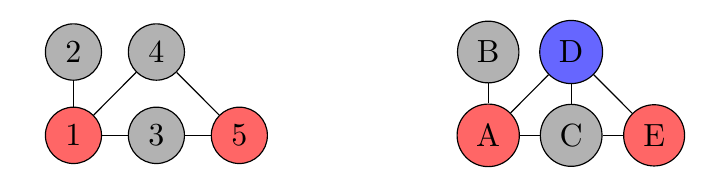

Le graphe de gauche présente une coloration propre utilisant deux couleurs (gris et rouge) alors qu'à droite nous avons un exemple de coloration à trois couleurs (gris, rouge et bleu)

Par la suite, on supposera que les graphes sont représentés grâce à <code>networkx</code> et que les couleurs des sommets sont codées grâce à un attribut "couleur" associé à chaque sommet.

## Soyons gourmand

1. Écrire une fonction <code>couleur_disponible</code> avec les paramètres suivants:
  - <code>G</code> est un graphe
  - <code>palette</code> est une liste correspondant à l'ensemble des couleurs possibles
  - <code>sommet</code> est un sommet de <code>G</code>. 
  
  Cette fonction renvoie la première couleur de disponible pour colorier proprement <code>sommet</code>. Si aucune couleur n'est disponible, la fonction renverra <code>None</code>.


In [2]:
def couleur_disponible(G,palette,sommet):
    for couleur in palette:
        est_dispo = True
        for v in G[sommet]:
            couleur_sommet = G.nodes[v]["couleur"]
            if couleur_sommet == couleur:
                est_dispo = False
                break
        if est_dispo:
            return couleur
    return None

2. En vous servant de la fonction précédente, proposer une fonction de coloration <code>coloration_gloutonne_avec_palette</code> qui va colorier les sommets les un à la suite des autres avec la première couleur disponible. La fonction prendra également en paramètre un graphe, une palette et une liste de sommets qui correspond à l'ordre dans lequel les sommets doivent être coloriés. Au final, la fonction retournera <code>True</code> si la coloration a pu être effectué et <code>False</code> sinon.

In [6]:
def coloration_gloutonne_avec_palette(G,palette,liste_sommets):
    for sommet in liste_sommets:
        couleur_proposee = couleur_disponible(G,palette,sommet)
        if couleur_proposee != None:
            G.nodes[sommet]["couleur"] = couleur_proposee
            return True
    return False

3. Essayez la fonction précédente sur le graphe chemin $P=\{u_0,u_1,u_2,u_3\}$ avec l'ordre $u_0,u_1,u_2,u_3$ puis l'ordre $u_0,u_3,u_2,u_1$, toujours avec la palette $\{0,1\}$. Que constatez-vous? Que pouvez-vous en déduire?

In [7]:
import networkx as nx

l1 = [0,1,2,3]
l2 = [0,3,2,1]

P = nx.path_graph(4)
for u in P.nodes:
    P.nodes[u]["couleur"] = None
    
P1 = nx.Graph(P)
P2 = nx.Graph(P)

print(coloration_gloutonne_avec_palette(P1,[0,1],l1))
print(coloration_gloutonne_avec_palette(P2,[0,1],l2))

True
True


4. Modifiez la fonction <code>coloration_gloutonne_avec_palette</code> qui va partir d'une palette à une couleur (l'entier 0) et qui va essayer de colorier le graphe avec cette palette. Si la coloration n'est pas possible, il faudra augmenter la palette contenant $i$ couleurs en y ajoutant une $i+1$-ème couleur et colorier ce sommet avec cette nouvelle couleur. La fonction renverra le nombre de couleurs utilisées pour colorier proprement le graphe.

In [9]:
def coloration_gloutonne(G,liste_sommets):
    palette = [1]
    for sommet in liste_sommets:
        couleur = couleur_disponible(G,palette,sommet)
        if couleur == None:
            couleur = len(palette) + 1
            palette.append(couleur)
        G.nodes[sommet]["couleur"] = couleur
    return len(palette)

C = nx.cycle_graph(6)
for u in C.nodes:
    C.nodes[u]["couleur"] = None
print(coloration_gloutonne(C,[i for i in range(len(C.nodes))]))

2


En fait il est possible facilement de démontrer que pour tout graphe $G$ avec un sommet de degré maximum $\Delta$, le nombre de couleurs utilisées par notre méthode gloutonne est au plus de $\Delta +1$, quel que soit l'ordre des sommets. Pouvez-vous dire pourquoi?

Une question importante consiste maintenant à se demander quel est le nombre minimum de couleurs nécessaires pour colorier proprement un graphe $G$. Ce nombre minimal s'appelle le *nombre chromatique* $\chi(G)$. L'utilisation de l'algorithme glouton nous donne donc une borne supérieure sur $\chi(G)\le \Delta(G)+1$, qui est atteinte pour les graphes complets (tous les sommets sont connectés entre eux) et les cycles de longueur impaire. Pour tous les autres graphes, le [théorème de Brooks](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Brooks) montre que le nombre chromatique est au plus de $\Delta$.

## En rouge et noir

Dans toute la suite, on s'intéresse aux colorations les plus simples, celles avec deux couleurs ("red" et "black"). Les graphes pouvant être coloriés avec deux couleurs sont des graphes **bipartis**. 

Tout d'abord considérons le cas simple d'un chemin.

1. Proposez un algorithme permettant de $2$-colorier (c'est-à-dire trouver une coloration propre à $2$ couleurs) un chemin. 

In [ ]:
# Idée: on colorie de manière alterné les sommets

def coloration_chemin(P):
    pass
        

Considérons maintenant le graphe suivant:

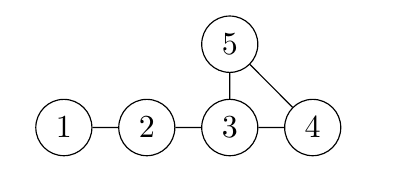

2. Est-il possible de $2$-colorier un tel graphe? Quelle partie du graphe pose problème?

De manière générale, tout graphe possèdant un cycle impair ne peut pas être colorier. En partant de cette propriété, nous allons maintenant proposer un programme pour $2$-colorier un graphe $G$, si possible.

3. En quoi l'utilisation d'un parcours en profondeur peut-il nous aider?

4. Ecrivez une fonction <code>bicoloriage</code> qui prend en paramètre un graphe $G$ et qui tente de colorier les sommets en rouge ou noir. En cas de succès, la fonction renverra un dictionnaire associant sommet et couleur. En cas d'échec, la fonction retournera le cycle impair qui aura été détecté.